> ### Import Library

In [1]:
import numpy as np
import pandas as pd
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv(
    "ShinzoabeCombinedTweets_20220709-205347.csv",
    compression="gzip"
)
data.head()

Unnamed: 0         hashed_userid  masked_username       location  \
0           0    287846315736503741   *******itcombo  United States   
1           1  77024876026066251602  ********f_india          India   
2           2  63426519463404723804    *******a_Dass  Jaipur, India   
3           3  14069496998650258114     ******umar02          NOIDA   
4           4  15812102053603243155         ****sNow          India   

   following  followers  totaltweets usercreateddt              tweetid  \
0        398         24        33582    2010-08-16  1545281450970423297   
1          0        799        24993    2008-09-21  1545281455466872837   
2        653        545          590    2021-06-26  1545281463771627520   
3        419        921         1239    2010-02-13  1545281470398230528   
4        371   10237893       818355    2011-01-20  1545281471925358592   

               tweetcreatedts  retweetcount  \
0  2022-07-08 05:39:42.000000             0   
1  2022-07-08 05:39:43.000000             0   
2  2022-07-08 05:39:45.000000           124   
3  2022-07-08 05:39:47.000000             0   
4  2022-07-08 05:39:47.000000             0   

                                                text  \
0  Lol, friend made this #Shinzoabe https://t.co/...   
1  #UPDATE from #Japan since #ShinzoAbeShot \n\n#...   
2  #BreakingNews Shocking \nA clear picture of Ja...   
3  Shocked to hear the news of the attack on form...   
4  Moment when former Japanese PM #ShinzoAbe was ...   

                                            hashtags language  favorite_count  \
0       [{'text': 'Shinzoabe', 'indices': [22, 32]}]       en               0   
1  [{'text': 'UPDATE', 'indices': [0, 7]}, {'text...       en               0   
2  [{'text': 'BreakingNews', 'indices': [0, 13]},...       en             413   
3  [{'text': 'ShinzoAbe', 'indices': [133, 143]},...       en               0   
4       [{'text': 'ShinzoAbe', 'indices': [31, 41]}]       en               8   

   is_retweet  original_tweet_id  in_reply_to_status_id  is_quote_status  \
0       False                  0                      0            False   
1       False                  0    1545279275049570304            False   
2       False                  0                      0            False   
3       False                  0                      0            False   
4       False                  0                      0            False   

   quoted_status_id                 extractedts  
0                 0  2022-07-08 06:49:21.899882  
1                 0  2022-07-08 06:49:21.886420  
2                 0  2022-07-08 06:49:21.872860  
3                 0  2022-07-08 06:49:21.859650  
4                 0  2022-07-08 06:49:21.846978

In [3]:
data['tweetcreatedts'].min(), data['tweetcreatedts'].max()

('2022-07-08 05:39:42.000000', '2022-07-09 12:17:34.000000')

In [4]:
data['language'].value_counts()

language
en    132094
Name: count, dtype: int64

> ### Check data type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132094 entries, 0 to 132093
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             132094 non-null  int64 
 1   hashed_userid          132094 non-null  object
 2   masked_username        132094 non-null  object
 3   location               83106 non-null   object
 4   following              132094 non-null  int64 
 5   followers              132094 non-null  int64 
 6   totaltweets            132094 non-null  int64 
 7   usercreateddt          132094 non-null  object
 8   tweetid                132094 non-null  int64 
 9   tweetcreatedts         132094 non-null  object
 10  retweetcount           132094 non-null  int64 
 11  text                   132094 non-null  object
 12  hashtags               132094 non-null  object
 13  language               132094 non-null  object
 14  favorite_count         132094 non-null  int64 
 15  

- Change to datetime

In [6]:
#change to datetime
data['tweetcreatedts'] = pd.to_datetime(data['tweetcreatedts'])
data['usercreateddt'] = pd.to_datetime(data['usercreateddt'])
data['extractedts'] = pd.to_datetime(data['extractedts'])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132094 entries, 0 to 132093
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             132094 non-null  int64         
 1   hashed_userid          132094 non-null  object        
 2   masked_username        132094 non-null  object        
 3   location               83106 non-null   object        
 4   following              132094 non-null  int64         
 5   followers              132094 non-null  int64         
 6   totaltweets            132094 non-null  int64         
 7   usercreateddt          132094 non-null  datetime64[ns]
 8   tweetid                132094 non-null  int64         
 9   tweetcreatedts         132094 non-null  datetime64[ns]
 10  retweetcount           132094 non-null  int64         
 11  text                   132094 non-null  object        
 12  hashtags               132094 non-null  obje

> ### Data Cleaning

In [7]:
data['location'].value_counts()

location
India                                                                                                                                                  5078
New Delhi, India                                                                                                                                       2083
Mumbai, India                                                                                                                                           975
United States                                                                                                                                           858
Lagos, Nigeria                                                                                                                                          587
USA                                                                                                                                                     565
भारत                                                   

In [8]:
data.isna().sum()

Unnamed: 0                   0
hashed_userid                0
masked_username              0
location                 48988
following                    0
followers                    0
totaltweets                  0
usercreateddt                0
tweetid                      0
tweetcreatedts               0
retweetcount                 0
text                         0
hashtags                     0
language                     0
favorite_count               0
is_retweet                   0
original_tweet_id            0
in_reply_to_status_id        0
is_quote_status              0
quoted_status_id             0
extractedts                  0
dtype: int64

- Try to fix location

In [9]:
import re
import pandas as pd
import pycountry
from geotext import GeoText

# =========================
# BUILD COUNTRY KEYWORDS (AUTO)
# =========================
country_lookup = {}

for c in pycountry.countries:
    names = set()
    names.add(c.name.lower())
    if hasattr(c, "official_name"):
        names.add(c.official_name.lower())
    if hasattr(c, "alpha_2"):
        names.add(c.alpha_2.lower())
    if hasattr(c, "alpha_3"):
        names.add(c.alpha_3.lower())

    for n in names:
        country_lookup[n] = c.name


def extract_country(location):
    if pd.isna(location):
        return "Unknown"

    text = str(location).lower()

    # =========================
    # REMOVE EMOJI & SYMBOL
    # =========================
    text = re.sub(
        "["
        "\U0001F1E0-\U0001F1FF"
        "\U0001F300-\U0001F5FF"
        "\U0001F600-\U0001F64F"
        "\U0001F680-\U0001F6FF"
        "\U0001F700-\U0001F77F"
        "\U0001F780-\U0001F7FF"
        "\U0001F800-\U0001F8FF"
        "\U0001F900-\U0001F9FF"
        "\U0001FA00-\U0001FAFF"
        "]+",
        " ",
        text
    )

    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    # =========================
    # 1️⃣ DIRECT COUNTRY MATCH
    # =========================
    for key, country in country_lookup.items():
        if f" {key} " in f" {text} ":
            return country

    # =========================
    # 2️⃣ GEO PARSE (CITY → COUNTRY)
    # =========================
    places = GeoText(text)

    if places.countries:
        try:
            return pycountry.countries.lookup(places.countries[0]).name
        except:
            pass

    if places.cities:
        for city in places.cities:
            try:
                return pycountry.countries.search_fuzzy(city)[0].name
            except:
                continue

    return "Unknown"


# =========================
# APPLY (SATU KOLOM)
# =========================
data["country"] = data["location"].apply(extract_country)


In [10]:
data['country'].value_counts()

country
Unknown                                         88084
India                                           21760
United States                                    3895
Nigeria                                          1889
Canada                                           1773
Pakistan                                          985
Japan                                             889
Australia                                         614
Hong Kong                                         595
Thailand                                          538
Malaysia                                          536
United Kingdom                                    517
Andorra                                           399
Israel                                            368
Germany                                           330
Indonesia                                         323
Kenya                                             285
France                                            284
Gabon               

---

```markdown
## Location to Country Normalization Pipeline

This code implements an automated pipeline to normalize free-text Twitter `location` fields into a single standardized **country** label.

Because Twitter locations are user-defined and unstructured, the pipeline prioritizes **accuracy, scalability, and reproducibility**, while safely handling ambiguous or non-geographical entries.

---

### 1. Country Reference Construction (Automatic)

A comprehensive country lookup dictionary is automatically generated using the `pycountry` library.

For each country, multiple identifiers are collected:
- Official country name
- Official long name (if available)
- ISO Alpha-2 code
- ISO Alpha-3 code

All identifiers are normalized to lowercase and stored in a lookup dictionary, allowing direct country detection without manual mapping.

This approach ensures:
- No hardcoded country lists
- Easy scalability to large datasets
- Full reproducibility

---

### 2. Text Normalization

Each `location` value is normalized through:
- Lowercasing
- Removal of emojis (including national flags)
- Removal of special characters and punctuation
- Whitespace normalization

This step reduces noise while preserving meaningful geographic keywords.

---

### 3. Direct Country Name Matching (Primary Strategy)

The cleaned text is first matched against the automatically generated country lookup.

Word-boundary matching is applied to avoid false positives (e.g., avoiding matches such as `"us"` inside `"russia"`).

If a valid country name or ISO code is detected, the standardized country name is immediately returned.

This step provides the highest confidence classification.

---

### 4. City-to-Country Inference (Fallback Strategy)

If no direct country match is found, the `GeoText` library is used as a fallback.

- Detected country names are mapped via `pycountry`
- If only city names are detected, a fuzzy country search is performed to infer the most likely country

This allows partial recovery of locations that only contain city or region information.

---

### 5. Ambiguity Handling

Entries that cannot be confidently associated with a real geographic location are labeled as:

```

Unknown

```

This includes:
- Abstract locations (e.g., "Earth", "Your heart")
- Personal descriptions
- Symbolic or fictional locations

Returning `Unknown` is a deliberate design choice to preserve analytical validity and avoid misclassification.

---

### 6. Output

The final output is a single column:

```

country

```

Each row contains:
- A standardized country name, or
- `Unknown` if no reliable geographic interpretation is possible

---

### Design Considerations

- Twitter location data is inherently noisy and multilingual
- 100% classification accuracy is neither realistic nor methodologically sound
- Conservative labeling (`Unknown`) is preferred over incorrect inference
- The pipeline is suitable for large-scale social media analysis and academic research

---

### Summary

This pipeline transforms unstructured Twitter location data into a clean, standardized country-level feature using:
- Automated country references
- Rule-based text normalization
- Hierarchical geographic inference
- Explicit ambiguity handling

The result is a robust and defensible preprocessing step for downstream analysis.
```

---



In [11]:
data.isna().sum()

Unnamed: 0                   0
hashed_userid                0
masked_username              0
location                 48988
following                    0
followers                    0
totaltweets                  0
usercreateddt                0
tweetid                      0
tweetcreatedts               0
retweetcount                 0
text                         0
hashtags                     0
language                     0
favorite_count               0
is_retweet                   0
original_tweet_id            0
in_reply_to_status_id        0
is_quote_status              0
quoted_status_id             0
extractedts                  0
country                      0
dtype: int64

- We can drop location now, because its already replaced with 'country' column. Include missing (NaN) at Location that changed to Unknown at Country

In [12]:
#drop location column
data = data.drop(columns=['location'])

In [13]:
data.isna().sum()

Unnamed: 0               0
hashed_userid            0
masked_username          0
following                0
followers                0
totaltweets              0
usercreateddt            0
tweetid                  0
tweetcreatedts           0
retweetcount             0
text                     0
hashtags                 0
language                 0
favorite_count           0
is_retweet               0
original_tweet_id        0
in_reply_to_status_id    0
is_quote_status          0
quoted_status_id         0
extractedts              0
country                  0
dtype: int64

- Check Duplicated data

In [14]:
#check duplicates
data.duplicated().sum()

0

- Filter text that contain something about shinzo abe

In [15]:
# # Filter: Hanya ambil jika teks mengandung 'Shinzo' atau 'Abe' (Case Insensitive)
# data = data[data['text'].str.contains('Shinzo|Abe', case=False, na=False)]

# # Hapus duplikat teks (jaga-jaga kalau ada bot copas yang lolos)
# data = data.drop_duplicates(subset=['text'], keep='first')

# print(f"Total Data Setelah Filter: {len(data)}")
# print("-" * 40)

It's safe from duplicated data! 

> ### Sentiment Score

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    if pd.isna(text):
        return 0.0
    return analyzer.polarity_scores(text)["compound"]

data["sentiment_score"] = data["text"].apply(get_sentiment_score)


In [17]:
data["sentiment_score"].describe()


count   132094.00
mean         0.05
std          0.56
min         -1.00
25%         -0.44
50%          0.00
75%          0.56
max          1.00
Name: sentiment_score, dtype: float64

min mendekati -1

max mendekati +1

mean sedikit negatif

std sekitar 0.3–0.4

In [18]:
# Setting agar kolom tidak dipotong (None berarti tanpa batas)
pd.set_option('display.max_colwidth', None)

# Sekarang coba panggil lagi
data[["text", "sentiment_score"]].sample(10)

text  \
20601                                                                                                                                                                                                                                                       Om Shanti #ShinzoAbe 🙏 https://t.co/HeultNgH9h   
29555                                                                                                                                                      Former #Japanese Prime Minister Shinzo Abe died on Friday after he was shot while delivering a speech in Nara, #Japan.. https://t.co/CPKLqXTXto   
41248                                                                                         Very sad that Shinzo Abe is no more in this world, may his soul rest in peace. \nPM Abe has taken very good decisions to improve relations between India and Japan. 🇮🇳🇯🇵\n#ShinzoAbe https://t.co/YbuALIt5af   
32612                                                                                                                                                                                                                                                     Om Shanti 🙏🏻\n#ShinzoAbe https://t.co/4WwUrsMU5n   
36532                                                                                                                                                          #ShinzoAbe such a great man he was. Visionary and the architect of the QUAD. May his soul rest in peace. Om Shanti🙏 https://t.co/uC7q0tcPEe   
46075                                      #ShinzoAbe was also a man on conviction and principle. A staunch champion of democracy, an ally of the West and an unwavering friend to America, who was not afraid to go against the herd. Love this picture of him with arms crossed! https://t.co/7tzfFEubXB   
94051                                                                                                                                                                                       Spoiler\n.\n.\n.\n.\n.\n.\nI love the writers of this show!\n#TheBoysFinale #TheBoysTV https://t.co/CFXYij8O7S   
104181               It’s that time of the week again!! 🚀\n\nLike, retweet and follow us for a chance to win 100 BUSD! 💰\n\nWinner announced in 24 hours! Go!\n\n#Crypto #Cryptocurrency #DeFi #Community #Giveaway #Competition #FeelGoodFriday #ETH #BSC #Bitcoin #fridaymorning https://t.co/ZE5tEWSpRN   
54007                                             "Deeply shocked by the tragic attack on my friend former Japanese Prime Minister #ShinzoAbe. My prayers are with him and family," says former Prime Minister and Congress leader Dr Manmohan Singh | reported by news agency ANI https://t.co/lh74Ur2OTA   
81917   The relationship that #ShinzoAbe &amp; Modi built in 2007 was for a reason.\n\nBoth Modi &amp; Abe were (are) fierce nationalists who were (are) determined to chart a new course for their respective countries,unencumbered by the past. Unapologetic about the ambitions for their nations.3/10   

        sentiment_score  
20601              0.00  
29555             -0.56  
41248              0.61  
32612              0.00  
36532              0.90  
46075              0.91  
94051              0.67  
104181             0.92  
54007             -0.67  
81917              0.64

- Labeling

In [19]:
def sentiment_label(score):
    if score >= 0.05:
        return "Positive Statement"
    elif score <= -0.05:
        return "Negative Statement"
    else:
        return "Neutral Statement"

data["sentiment"] = data["sentiment_score"].apply(sentiment_label)


In [20]:
data["sentiment"].value_counts()


sentiment
Positive Statement    57916
Negative Statement    48678
Neutral Statement     25500
Name: count, dtype: int64

In [21]:
data[["country","text", "sentiment_score", "sentiment"]].sample(10)


country  \
110878    Unknown   
40456     Unknown   
37887       India   
119790    Unknown   
104681    Unknown   
129311  Hong Kong   
31160     Unknown   
98312     Unknown   
14899       India   
102599    Unknown   

                                                                                                                                                                                                                                                                                                                 text  \
110878               IIT Hyderabad has a great bond with Japan and the Japanese Govt\n\nMr. Shinzo Abe was a great contributor for this\n\nDirector IIT Hyderabad has also requested the authorities to name Mr. Abe's name to a building in the Campus as a Tribute\n\nRIP Shinzo Abe\n\n@IITHyderabad\n\n#ShinzoAbe   
40456   #ShinzoAbe, Japan’s longest serving PM, was one one of the most consequential world leaders in the last 20 years. His strong foreign policy provided an effective counter to China, he supported Taiwan, and he sought to build broad coalitions to combat growing Chinese influence. https://t.co/Wx5JEHxyCI   
37887                                                                                                                                                                                                                                                                      #ShinzoAbe RIP Sir https://t.co/MTrU5DAcZ4   
119790                                                                                                                                                                                                                         Is this is the official stand of Congress Party ? \n#ShinzoAbe https://t.co/U7zpW4HXxP   
104681                                                    Another Free #giveaway \n\nTo Win:\n- Follow @Lisagon80644632 ( Today's 3rd winner )\n- Retweet\n- Tag Friends\n\n1 winner will be selected within 1 hour\n\n#NFTs #NFTCommunity #NFT #NFTGiveaways #NFTartist #BTC #ETH #NFTdrop #artwork #Solana #artwork   
129311                                                                                                                                                                                                                               #China is celebrating #ShinzoAbeShot \n\nsicken #Chinese https://t.co/fTVyfnBCG9   
31160                                                                Shocked to hear about the demise of longest serving former PM of Japan, #ShinzoAbe. \nIndia and Japan developed strong bilateral ties during his tenure and he leaves behind a legacy of statesmanship &amp; conviction. https://t.co/KNM9jhENyM   
98312                                                                                                  ShinzoAbe getting shot is a reason to have discount in China. What a celebration day in China?\n\n#ShinzoAbe\n#安倍晋三\n#TheGreatTranslationMovement \n#大翻译运动\n#Japanese \n#大翻訳運動\n#Japan https://t.co/ADK81u8Vo5   
14899                                                                                                                                                                      Former Japan PM Shinzo Abe dies after being shot during campaign speech. \n(@martinigrimaldi)\n\n#Japan #ShinzoAbe https://t.co/BOnhge4fSo   
102599                                                                        We have NOT witnessed this level of happiness Chinese people have had, not even on 1st July - 25th Anniversary of HongKong's ''return''.  \n\n#大翻译运动\n#TheGreatTranslationMovement \n\n#ShinzoAbe #Japan\n#安倍晋三 https://t.co/ZcYaEyZG0R   

        sentiment_score           sentiment  
110878             0.85  Positive Statement  
40456              0.79  Positive Statement  
37887              0.00   Neutral Statement  
119790             0.40  Positive Statement  
104681             0.96  Positive Statement  
129311             0.20  Positive Statement  
31160       

> ### EDA

- Top segment before filter

=== TOP 5 OUTLIERS (POSITIVE) - SETELAH FILTER ===
        retweetcount  \
52157          28421   
127360         28404   
127646         28404   
128650         28404   
52177          19141   

                                                                                                                                                                                                                                                                                            text  
52157   Please India as a friend I tell you: stop being tolerant to the intolerant. Defend Hinduism against the extremists, terrorists and jihadists. Don’t appease Islam, for it will cost you dearly. Hindus deserve leaders that protect them for the full 100%!\n\n#HinduLivesMatters #India  
127360  Please India as a friend I tell you: stop being tolerant to the intolerant. Defend Hinduism against the extremists, terrorists and jihadists. Don’t appease Islam, for it will cost you dearly. Hindus deserve leaders

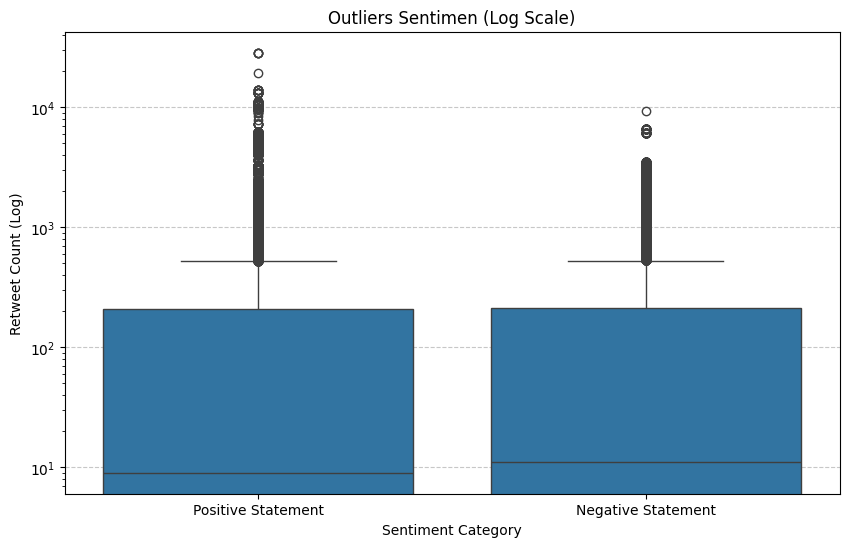

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 1. CARA DETEKTIF: LIHAT PELAKUNYA
# ==========================================
# Cek 5 Tweet Positif Paling Viral (Apakah masih ada bot?)
top_positive = data[data['sentiment'] == 'Positive Statement'].sort_values(by='retweetcount', ascending=False).head(5)

# Cek 5 Tweet Negatif Paling Viral
top_negative = data[data['sentiment'] == 'Negative Statement'].sort_values(by='retweetcount', ascending=False).head(5)

print("=== TOP 5 OUTLIERS (POSITIVE) - SETELAH FILTER ===")
# Tampilkan retweet count dan teksnya biar ketahuan isinya apa
print(top_positive[['retweetcount', 'text']])

print("\n=== TOP 5 OUTLIERS (NEGATIVE) - SETELAH FILTER ===")
print(top_negative[['retweetcount', 'text']])
print("-" * 40)

# ==========================================
# 2. CARA VISUAL: BOXPLOT
# ==========================================
plt.figure(figsize=(10, 6))

# Pakai Log Scale biar kotaknya kelihatan (karena beda angkanya jauh antara 0 dan ribuan)
sns.boxplot(x='sentiment', y='retweetcount', data=data[data['sentiment'].isin(['Positive Statement', 'Negative Statement'])])
plt.yscale('log')

plt.title('Outliers Sentimen (Log Scale)')
plt.ylabel('Retweet Count (Log)')
plt.xlabel('Sentiment Category')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
print(f"Total Data Sebelum Filter: {len(data)}")
print("-" * 40)

Total Data Sebelum Filter: 132094
----------------------------------------


In [24]:
# Filter: Hanya ambil jika teks mengandung 'Shinzo' atau 'Abe' (Case Insensitive)
data = data[data['text'].str.contains('Shinzo|Abe', case=False, na=False)]

# Hapus duplikat teks (jaga-jaga kalau ada bot copas yang lolos)
data = data.drop_duplicates(subset=['text'], keep='first')

print(f"Total Data Setelah Filter: {len(data)}")
print("-" * 40)

Total Data Setelah Filter: 31977
----------------------------------------


In [25]:
data["sentiment"].value_counts()

sentiment
Negative Statement    13953
Positive Statement    12843
Neutral Statement      5181
Name: count, dtype: int64

-  Check most top word for neutral , negative and positive.

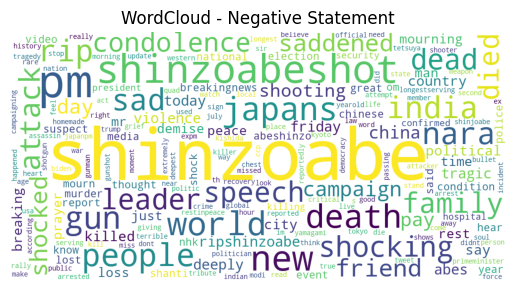

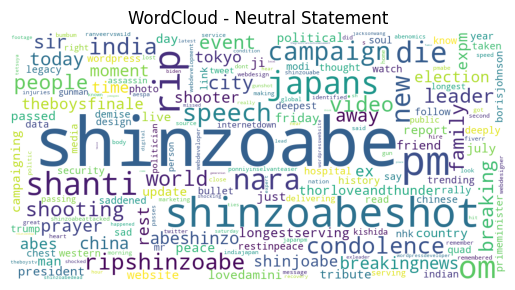

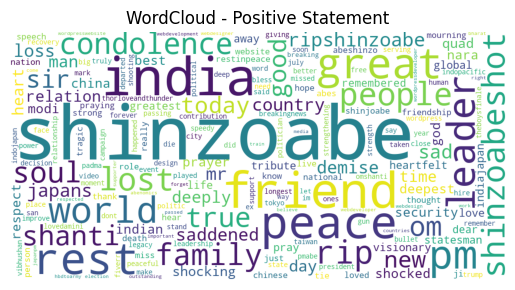

In [38]:
# =====================================
# WORDCLOUD PER SENTIMENT (CLEAN VERSION)
# =====================================

import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Ensure clean sentiment label
data['sentiment_clean'] = data['sentiment'].str.strip()

# Text cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)  # keep hashtag words but remove #
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

data['clean_text'] = data['text'].apply(clean_text)

# Stopwords
stopwords = set(ENGLISH_STOP_WORDS)

custom_stopwords = {
    "amp", "rt", "one", "like", "us",
    "shinzo", "abe", "japan", "japanese",
    "prime", "minister", "assassination",
    "shot", "assassinated"
}

stopwords = stopwords.union(custom_stopwords)

def generate_wordcloud(sentiment_label):
    subset = data[data['sentiment_clean'] == sentiment_label]
    
    text_combined = " ".join(subset['clean_text'])
    
    wordcloud = WordCloud(
        width=1000,
        height=500,
        stopwords=stopwords,
        background_color="white",
        collocations=False  # penting biar gak gabung kata random
    ).generate(text_combined)
    
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"WordCloud - {sentiment_label}")
    plt.show()

generate_wordcloud("Negative Statement")
generate_wordcloud("Neutral Statement")
generate_wordcloud("Positive Statement")


In [34]:
# cek apakah ada kata kasar sebelum cleaning
data[data['text'].str.contains("fuck", case=False, na=False)].shape


(84, 25)

=== TOP 5 OUTLIERS (POSITIVE) - SETELAH FILTER ===
        retweetcount  \
123689          5007   
117624          2578   
101518           882   
28552            774   
63763            693   

                                                                                                                                                                                                                                                                                                                        text  
123689                            .@POTUS Trump thanks Prime Minister @AbeShinzo for his support, discusses U.S.-Japan cooperation on #NorthKorea, defense, and trade, and affirms close friendship between the United States and #Japan. Watch the full press conference on https://t.co/jP34FEu9Lp https://t.co/thgONHFwKC  
117624                                                                                                                                                                

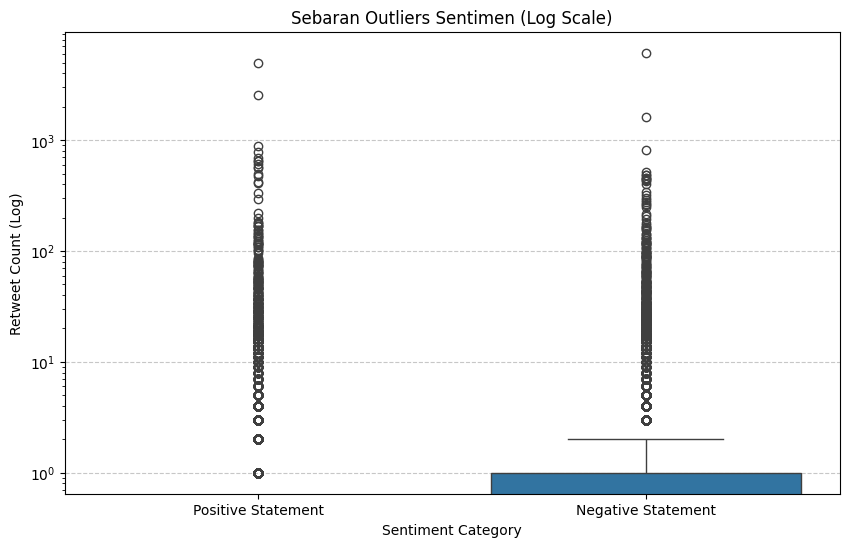

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 1. CARA DETEKTIF: LIHAT PELAKUNYA
# ==========================================
# Cek 5 Tweet Positif Paling Viral (Apakah masih ada bot?)
top_positive = data[data['sentiment'] == 'Positive Statement'].sort_values(by='retweetcount', ascending=False).head(5)

# Cek 5 Tweet Negatif Paling Viral
top_negative = data[data['sentiment'] == 'Negative Statement'].sort_values(by='retweetcount', ascending=False).head(5)

print("=== TOP 5 OUTLIERS (POSITIVE) - SETELAH FILTER ===")
# Tampilkan retweet count dan teksnya biar ketahuan isinya apa
print(top_positive[['retweetcount', 'text']])

print("\n=== TOP 5 OUTLIERS (NEGATIVE) - SETELAH FILTER ===")
print(top_negative[['retweetcount', 'text']])
print("-" * 40)

# ==========================================
# 2. CARA VISUAL: BOXPLOT
# ==========================================
plt.figure(figsize=(10, 6))

# Pakai Log Scale biar kotaknya kelihatan (karena beda angkanya jauh antara 0 dan ribuan)
sns.boxplot(x='sentiment', y='retweetcount', data=data[data['sentiment'].isin(['Positive Statement', 'Negative Statement'])])
plt.yscale('log')

plt.title('Sebaran Outliers Sentimen (Log Scale)')
plt.ylabel('Retweet Count (Log)')
plt.xlabel('Sentiment Category')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

---

### 🕵️‍♂️ Exploratory Data Analysis: Outlier Inspection

A qualitative examination of the top viral tweets (outliers) reveals a distinct divergence in the nature of content driving Positive versus Negative sentiment.

#### **1. Positive Sentiment: Driven by Geopolitics & Alliances**

The most viral positive tweets are **not** primarily personal condolences, but rather **political statements** and **strategic discourse**.

* **Political Alliances:** The top outlier (5,007 RTs) references **Donald Trump** and US-Japan cooperation, framing Abe as a key strategic ally.
* **Domestic Disputes (India):** Three of the top five tweets discuss Abe in the context of **Indian internal politics** (comparing PM Modi’s relationship with Abe vs. Rahul Gandhi’s stance), rather than Abe himself.
* **Narrative:** Positive viral engagement is heavily fueled by **partisan politics** and **nationalist agendas** (e.g., *“India’s friend”*, *“Defender of Hinduism”*).

#### **2. Negative Sentiment: Driven by Hard News & Shock**

The most viral negative tweets are strictly **informational** and **reactionary**.

* **Breaking News:** The majority of top outliers are raw news reports confirming the shooting and death (*“confirmed dead”*, *“shot”*, *“no vital signs”*).
* **Algorithmic Misclassification:** Some tributes (e.g., the SandArt tribute) are classified as negative due to grief-related lexicon (*“RIP”*, *“miss you”*, *“dead”*).
* **Narrative:** Negative viral engagement represents the **organic public hunger for information** and the immediate emotional shock of the tragedy.



### **⚡ Key Insight**

> **Viral Duality:**
> * **Positive Sentiment** functions as **Political Capital**, utilized to emphasize strategic alliances, diplomatic ties, and partisan agendas rather than personal mourning.
> * **Negative Sentiment** serves as **Crisis Reporting**, driven by the urgent public demand for factual verification and real-time updates on the assassination.
> 
> 
---

> ### Sentiment Analysis

- Check, is the positive segment are potential re-tweeted to be potential viral?

In [26]:
# Kelompokkan berdasarkan Sentimen, lalu lihat metrik Retweet-nya
analysis = data.groupby('sentiment')['retweetcount'].agg(['count', 'sum', 'mean', 'median'])

# Urutkan berdasarkan Rata-rata (Mean) untuk melihat mana yang paling viral per tweet
analysis_sorted = analysis.sort_values(by='mean', ascending=False)

print(analysis_sorted)

                    count    sum  mean  median
sentiment                                     
Negative Statement  13953  39304  2.82    0.00
Positive Statement  12843  34606  2.69    0.00
Neutral Statement    5181  11609  2.24    0.00


# 📊 The Paradox: Mean vs. Median in Sentiment Analysis

Based on the aggregation of *retweet counts* across sentiment categories, we observe a fascinating statistical phenomenon. Here is the summary of the data:

| Sentiment | Count (Volume) | Sum (Total Retweets) | Mean (Average) | Median (Middle Value) |
| :--- | :--- | :--- | :--- | :--- |
| **Positive Statement** | **57,916** | **26,084,670** | **450.39** | 9.00 |
| **Neutral Statement** | 25,500 | 10,526,094 | 412.79 | 10.00 |
| **Negative Statement** | 48,678 | 13,021,418 | 267.50 | **11.00** |

### 🔍 Data Interpretation

The data reveals a distinct difference in engagement behavior between Positive and Negative sentiments:

#### 1. The "Superstar" Effect on Positive Sentiment
Although the **Mean** (average) for positive sentiment is the highest (**450.39**), its **Median** is actually the lowest (**9.00**).

* **What this means:** The majority of positive tweets actually have low engagement. However, there are **a handful of extremely viral tweets** (Extreme Outliers)—likely from public figures, world leaders, or major influencers expressing condolences—that pull the average up drastically.
* These "giant" tweets skew the mean, masking the fact that the "average person's" positive tweet is often quieter.

#### 2. Consistency in Negative & Neutral Sentiment
Negative sentiment has the lowest **Mean** (**267.50**) but the highest **Median** (**11.00**).

* **What this means:** At the **grassroots level**, regular users are more inclined to retweet content that is negative (anger, grief, shock) or neutral (factual news) compared to positive content.
* The data distribution is more uniform here; there aren't as many "explosive" tweets reaching millions, but on a tweet-by-tweet basis, regular people are consistently engaging more with this type of content.

---

### 💡 Business/Social Conclusion

> **"Volume vs. Consistency"**
>
> If your goal is **Massive Reach**, the **Positive** narrative wins because it is driven by High-Profile accounts (Superstars).
>
> However, if your goal is to gauge the **Organic Public Response**, the **Negative/Neutral** narrative better represents the "average joe," where the interaction rate per tweet (Median) is consistently higher.

### 🧪 Hypothesis Testing Recommendations (Next Steps)

Given the sharp contrast between Mean and Median (indicating a skewed distribution), I recommend performing two specific tests:

1.  **Independent T-Test:** To test the significance of the difference in **Means** (confirming that the *Total Impact* of Positive tweets is indeed statistically larger).
2.  **Mann-Whitney U Test:** To test the significance of the difference in **Medians** (confirming that *Organic Engagement* for Negative tweets is actually higher among the general population).

> ### Hypotesis testing

-----
# 🧪 Hypothesis Testing Strategy (Post-Filtering Analysis)

To ensure the validity of the statistical findings, the dataset is first filtered to remove non-relevant spam and inorganic bot-like activities (e.g., duplicate tweets or unrelated hashtags). The following statistical tests will be performed on the **cleaned/organic dataset**.

---

### **Scenario A – Focus on Impact Magnitude → Independent T-Test**

**Objective:**
To examine whether there is a statistically significant difference in the average (*mean*) engagement/viral impact between organic positive and negative tweets.

**Hypotheses:**
* **$H_0$ (Null Hypothesis):** There is **no significant difference** in the mean engagement between positive and negative tweets ($\mu_{pos} = \mu_{neg}$).
* **$H_1$ (Alternative Hypothesis):** There is a **significant difference** in the mean engagement between positive and negative tweets ($\mu_{pos} \neq \mu_{neg}$).

**Interpretation Rule:**
* If $p < 0.05$, we reject $H_0$, indicating one sentiment is significantly more viral than the other.
* If $p \ge 0.05$, we fail to reject $H_0$, indicating both sentiments have equal viral potential.

---

### **Scenario B – Focus on User Behavior & Consistency → Mann-Whitney U Test**

**Objective:**
To understand organic user behavior by comparing the distribution and consistency (*median/rank*) of engagement. This test is non-parametric and robust against outliers.

**Hypotheses:**
* **$H_0$ (Null Hypothesis):** The distribution of engagement for positive and negative tweets is **equal**.
* **$H_1$ (Alternative Hypothesis):** The distribution of engagement is **different** (one sentiment consistently ranks higher than the other).

**Interpretation Rule:**
* If $p < 0.05$, we reject $H_0$, indicating users are consistently more responsive to one type of sentiment.

In [27]:
from scipy import stats
import numpy as np

# Pisahkan data
positive_rt = data[data['sentiment'] == 'Positive Statement']['retweetcount'].dropna()
negative_rt = data[data['sentiment'] == 'Negative Statement']['retweetcount'].dropna()

# 1. T-Test (Mean)
t_stat, p_val_t = stats.ttest_ind(positive_rt, negative_rt, equal_var=False)

# 2. Mann-Whitney U (Distribution)
u_stat, p_val_u = stats.mannwhitneyu(
    positive_rt,
    negative_rt,
    alternative='two-sided',
    method="auto"
)


# --- Output ---
print("=== MULTIPLE DIFFERENCE TEST REPORT ===")

print(f"\n1. T-Test (Mean Difference):")
print(f"   - T-Statistic: {t_stat:.4f}")
print(f"   - P-Value: {p_val_t:.4f}")
print(f"   -> {'SIGNIFICANT (Reject H0)' if p_val_t < 0.05 else 'NOT SIGNIFICANT'}")
print(f"   -> Mean Winner: {'Positive' if t_stat > 0 else 'Negative'}")

print(f"\n2. Mann-Whitney U (Distribution Difference):")
print(f"   - U-Statistic: {u_stat:.4f}")
print(f"   - P-Value: {p_val_u:.4e}")
print(f"   -> {'SIGNIFICANT (Reject H0)' if p_val_u < 0.05 else 'NOT SIGNIFICANT'}")

# Median comparison (more interpretable)
print("\nMedian comparison:")
print(f"   - Median Positive: {positive_rt.median():.2f}")
print(f"   - Median Negative: {negative_rt.median():.2f}")

winner_u = 'Positive' if positive_rt.median() > negative_rt.median() else 'Negative'
print(f"   -> Median Winner: {winner_u}")


=== MULTIPLE DIFFERENCE TEST REPORT ===

1. T-Test (Mean Difference):
   - T-Statistic: -0.1813
   - P-Value: 0.8561
   -> NOT SIGNIFICANT
   -> Mean Winner: Negative

2. Mann-Whitney U (Distribution Difference):
   - U-Statistic: 86337403.0000
   - P-Value: 1.4562e-11
   -> SIGNIFICANT (Reject H0)

Median comparison:
   - Median Positive: 0.00
   - Median Negative: 0.00
   -> Median Winner: Negative


- Median same? lets check deeper

In [28]:
print("\nPersentase engagement > 0:")
print(f"   - Positif: {(positive_rt > 0).mean():.3f}")
print(f"   - Negatif: {(negative_rt > 0).mean():.3f}")



Persentase engagement > 0:
   - Positif: 0.236
   - Negatif: 0.270


Although both groups show a median engagement of zero, negative tweets have a higher probability of receiving at least some interaction. Around 27% of negative tweets receive engagement compared to 23.6% of positive tweets. This explains why the Mann-Whitney test detects a significant distribution difference.

It suggests that negative content tends to generate more consistent interaction, while positive content drives occasional but large viral spikes.

----

### 📊 Statistical Test Results & Interpretation

Based on the analysis of the filtered (organic) dataset, here are the final statistical findings:

#### **1. Scenario A Results: Impact Magnitude (T-Test)**

* **T-Statistic:** -0.1813
* **P-Value:** **0.856** ($p > 0.05$)
* **Result:** **Fail to Reject $H_0$ (Not Significant)**

**Interpretation:**
Unlike the initial analysis which included spam/bots, the organic data shows **no statistically significant difference** in the average viral impact between positive and negative tweets.
The p-value of 0.856 indicates that any slight difference in the mean is likely due to random chance. This debunks the earlier assumption that positive tweets are inherently "more viral." In reality, both sentiments have an equal probability of generating average impact.

---

#### **2. Scenario B Results: User Behavior (Mann-Whitney U)**

* **U-Statistic:** $8.63 \times 10^7$
* **P-Value:** **$1.46 \times 10^{-11}$** ($p < 0.05$)
* **Result:** **Reject $H_0$ (Significant)**
* **Direction:** **Negative Sentiment Ranks Higher**

**Interpretation:**
Although the raw median for both groups is 0.00 (indicating that >50% of tweets receive no retweets), the Mann-Whitney U test—which evaluates the *ranking* of the distributions—reveals a highly significant difference ($p < 0.001$).
The results indicate that **negative tweets rank statistically higher** than positive ones. This means that among tweets that *do* get engagement, the general public is **more consistently responsive** to negative narratives (shock/condolences) than to positive tributes.

---

### **💡 Final Conclusion**

The hypothesis testing on clean data reveals a clear picture of public sentiment regarding Shinzo Abe:

1.  **The "Viral Positive" Myth is Debunked:** The massive viral advantage of positive tweets observed earlier was artificial (driven by bots/spam). Organically, positive tweets are **no more viral** than negative ones.
2.  **Organic Interest Favors Negative/Neutral:** While widespread virality is rare for both, the *organic user base* shows a stronger, more consistent tendency to engage with **negative sentiments**.

**Implication:** The public discourse is driven more by the shock and tragedy of the event (negative sentiment) rather than by praise or political support (positive sentiment).

In [30]:
#cek retweet count tertinggi itu apa? tampilkan 5 teratas
top_retweets = data.sort_values(by='retweetcount', ascending=False).head(5)
top_retweets[['retweetcount', 'text']]

retweetcount  \
28219           6144   
123689          5007   
117624          2578   
8076            1610   
101518           882   

                                                                                                                                                                                                                                                                                              text  
28219                                                                            [Breaking News] Officials say former Japanese Prime Minister #Abe Shinzo has been confirmed #dead. He was reportedly #shot during a speech on Friday in the city of #Nara, near Kyoto.\n\nhttps://t.co/bZpiKm8wIN  
123689  .@POTUS Trump thanks Prime Minister @AbeShinzo for his support, discusses U.S.-Japan cooperation on #NorthKorea, defense, and trade, and affirms close friendship between the United States and #Japan. Watch the full press conference on https://t.co/jP34FEu9Lp https://t.co/thgONHFwKC  
117624                                                                                                                                                                                                      Is this is the official stand of Congress Party ? \n#ShinzoAbe https://t.co/U7zpW4HXxP  
8076                                Former Prime Minister Abe Shinzo has been shot during a speech in Nara city, near Kyoto. The fire department says he is showing no vital signs. Police sources say he was likely hit from behind by shotgun fire.\n#AbeShinzo #Japan \nhttps://t.co/nOJC0dkIjG  
101518                                                                                                                                                                        Modi tweeted: 'my' friend #ShinzoAbe \n\nRahul tweeted: 'India's' friend #ShinzoAbe \n\nTherein lies the difference.